In [180]:
# import the dependencies -- Done
# Load file  -- Done

# create the main dataframes for 
    # 1) Indicator (psi)
    # 2) Death rate
    # 3) readmission rate

# check if need any cleanup -- not sure we need it yet. -- Done

# Measure/indicator is the PSI Indicator
# MB: Pick one Measure/indicator to compare between hostipals in georgia 
# MB: Pick one Measure/indicator to compare  between hostipals in VA 
# AK: Pick Measure/indicator to compare between hostipals in georgia and VA

# TF: Pick death rate compare between hostipals in georgia 
# TF: Pick death rate to compare  between hostipals in VA 
# JA: Pick death rate to compare between hostipals in georgia and VA


# GF: Pick readmission rate to compare between hostipals in georgia 
# GF: Pick readmision rate  to compare  between hostipals in VA 
# JA: Pick readmission rate to compare between hostipals in georgia and VA


# crete the visualization 


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# filename: # VA_OutcomesMeasures_October2016_CMS_Submission
filepath = "data/VA_OutcomesMeasures_October2016_CMS_Submission.xlsx"


In [181]:
main_psi_df = pd.read_excel(filepath, sheet_name="PSI")
# main_psi_df.head()
main_dr_df = pd.read_excel(filepath, sheet_name="Death Rates")
# main_dr_df.head()
main_rr_df = pd.read_excel(filepath, sheet_name="Readmission Rate")
# main_rr_df.head()

In [231]:
# main_psi_df
working_psi_df = main_psi_df[(main_psi_df["State"]== 'VA') |    (main_psi_df["State"]== 'GA')]
# working_psi_df.head()

ga_psi_df = working_psi_df[working_psi_df["State"]=="GA"]
# ga_psi_df.head()

va_psi_df = working_psi_df[working_psi_df["State"]=="VA"]
# va_psi_df.head()

In [230]:
# main_rr_df readmission rate
working_rr_df = main_rr_df[(main_rr_df["State"]== 'VA') |    (main_rr_df["State"]== 'GA')]
# working_rr_df.head()

ga_rr_df = working_rr_df[working_rr_df["State"]=="GA"]
# ga_rr_df.head()

va_rr_df = working_rr_df[working_rr_df["State"]=="VA"]
# va_rr_df.head()

In [229]:
# main_dr_df death rate
working_dr_df = main_dr_df[(main_dr_df["State"]== 'VA') |    (main_dr_df["State"]== 'GA')]
# working_dr_df.head()

ga_dr_df = working_dr_df[working_dr_df["State"]=="GA"]
# ga_dr_df.head()
va_dr_df = working_dr_df[working_dr_df["State"]=="VA"]
# va_dr_df.head()


In [185]:
# # AK: Pick Measure/indicator to compare between hostipals in georgia and VA
# get a mean of the indicator 

In [307]:
# main_psi_df

working_psi_df = main_psi_df[(main_psi_df["State"]== 'VA') |    (main_psi_df["State"]== 'GA')]

# Data Clean up 
# 3) remove the columns values not needed.
working_psi_df  = working_psi_df[working_psi_df.Indicator!="04 - Death Among Surgical Inpatients"]


# 1) Ensure metrics are in correct data format.
working_psi_df['Observed Rate']=working_psi_df['Observed Rate'].replace({"*": 0})
working_psi_df['Expected Rate']=working_psi_df['Expected Rate'].replace({"*": 0})
working_psi_df['Risk Adjusted Rate']=working_psi_df['Risk Adjusted Rate'].replace({"*": 0})
# working_psi_df.loc[working_psi_df["Observed Rate"]== "*"].count()
# working_psi_df.loc[working_psi_df["Expected Rate"]== "*"].count()
# working_psi_df.loc[working_psi_df["Risk Adjusted Rate"]== "*"].count()

# 2) remove the columns not needed zipcode and Footnotes
working_psi_df = working_psi_df.drop(columns=["Zip\nCode","Footnotes"])
# working_psi_df = working_psi_df.drop(columns=["Zip\nCode"])
# working_psi_df = working_psi_df.drop(columns=["Footnotes"])


working_psi_df["RiskAdustementPerformanceScore"] =working_psi_df["Risk Adjusted Rate"]  -  working_psi_df["Observed Rate"]
working_psi_df["ExpectedPerformanceScore"] =working_psi_df["Expected Rate"]  -  working_psi_df["Observed Rate"]
# working_psi_df["BestPerformanceScore"] =working_psi_df["RiskAdustementPerformanceScore"]  -  working_psi_df["ExpectedPerformanceScore"]

working_psi_df.head()

# working_psi_df.groupby(["Indicator"]).sum()



,CCN#,VHA Facility,Address,City,State,Measure,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,95% Confidence Lower Limit,95% Confidence Upper Limit,Date Range,RiskAdustementPerformanceScore,ExpectedPerformanceScore
324,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,Patient Safety Indicators (PSI),03 - Pressure Ulcer,0.00,0.44,0.00,0,0.88,October 2012 – September 2015,0.00,0.44
326,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,Patient Safety Indicators (PSI),06 - Iatrogenic Pneumothorax,0.58,0.27,0.72,0.33,1.11,October 2012 – September 2015,0.14,-0.31
327,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,Patient Safety Indicators (PSI),07 - CLAB Infections,0.49,0.24,0.42,0.09,0.76,October 2012 – September 2015,-0.07,-0.25
328,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,Patient Safety Indicators (PSI),08 - Postop Hip Fracture,0.58,0.04,0.58,0.26,0.89,October 2012 – September 2015,0.00,-0.54
329,11030F,AUGUSTA VA MEDICAL CENTER,950 15TH STREET,AUGUSTA,GA,Patient Safety Indicators (PSI),09 - Postop Hemorrhage or Hematoma,4.90,5.80,4.35,1.57,7.13,October 2012 – September 2015,-0.55,0.90


In [308]:
ga_psi_df = working_psi_df[working_psi_df["State"]=="GA"]
ga_psi_df.head()

va_psi_df = working_psi_df[working_psi_df["State"]=="VA"]
# va_psi_df.head()


In [309]:
# virginia faiclity 
# create the dataset for plotting using the indicator and cleaning up the death rate indicator
va_facility_psi_df = va_psi_df.groupby(["Indicator"]).sum()
va_facility_psi_df = va_facility_psi_df.reset_index()
# "04 - Death Among Surgical Inpatients"
# del va_facility_psi_df.iloc(1) -- this is replaced by next line
va_facility_psi_df.head(10)
# va_facility_psi_df = va_facility_psi_df.drop(1)
# va_facility_psi_df.head(10)


,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,RiskAdustementPerformanceScore,ExpectedPerformanceScore
0,03 - Pressure Ulcer,0.00,1.50,0.00,0.00,1.50
1,06 - Iatrogenic Pneumothorax,0.70,0.87,0.84,0.14,0.17
2,07 - CLAB Infections,0.68,0.81,0.62,-0.06,0.13
3,08 - Postop Hip Fracture,0.86,0.13,0.87,0.01,-0.73
4,09 - Postop Hemorrhage or Hematoma,13.56,15.97,11.67,-1.89,2.41
5,10 - Postop Physiologic and Metabolic Derangem...,3.54,2.72,2.73,-0.81,-0.82
6,11 - Postop Respiratory Failure,36.03,28.59,38.87,2.84,-7.44
7,12 - Postop Pulmonary Embolism or DVT,13.87,15.50,13.22,-0.65,1.63
8,13 - Postop Sepsis,57.55,35.78,40.89,-16.66,-21.77
9,14 - Postop Wound Dehiscence,12.19,8.80,7.91,-4.28,-3.39


In [310]:
# Georgia faiclity 
#  create the dataset for plotting using the indicator and cleaning up the death rate indicator
ga_facility_psi_df = ga_psi_df.groupby(["Indicator"]).sum()
ga_facility_psi_df = ga_facility_psi_df.reset_index()
# "04 - Death Among Surgical Inpatients"
# del va_facility_psi_df.iloc(1) -- this is replaced by next line
# ga_facility_psi_df = ga_facility_psi_df.drop(1)
ga_facility_psi_df


,Indicator,Observed Rate,Expected Rate,Risk Adjusted Rate,RiskAdustementPerformanceScore,ExpectedPerformanceScore
0,03 - Pressure Ulcer,0.16,1.20,0.15,-0.01,1.04
1,06 - Iatrogenic Pneumothorax,1.01,0.71,1.19,0.18,-0.30
2,07 - CLAB Infections,0.86,0.65,0.68,-0.18,-0.21
3,08 - Postop Hip Fracture,0.58,0.13,0.58,0.00,-0.45
4,09 - Postop Hemorrhage or Hematoma,9.74,18.54,7.99,-1.75,8.80
5,10 - Postop Physiologic and Metabolic Derangem...,2.69,1.99,2.03,-0.66,-0.70
6,11 - Postop Respiratory Failure,24.32,18.22,27.31,2.99,-6.10
7,12 - Postop Pulmonary Embolism or DVT,7.45,12.88,8.32,0.87,5.43
8,13 - Postop Sepsis,54.33,22.25,45.93,-8.40,-32.08
9,14 - Postop Wound Dehiscence,0.00,4.80,0.00,0.00,4.80


In [257]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df.reindex
df


,lab,val
0,A,10
1,B,30
2,C,20


In [306]:
x=ga_facility_psi_df["Indicator"]
y=ga_facility_psi_df["Observed Rate"]
x1=va_facility_psi_df["Indicator"]
y1=va_facility_psi_df["Observed Rate"]

ga_facility_psi_df["Observed Rate"]
#        "Virginia": "va_facility_psi_df["Observed Rate"]}

# data = {"Georgia":[ga_facility_psi_df["Observed Rate"]],
#         "Virginia":[va_facility_psi_df["Observed Rate"]]}

data={"Georgia":[y],"Virginia":[y1]}
print(data)
# data = {"Georgia":[y],
#         "Virginia":[y1]}


# index =va_facility_psi_df["Indicator"]


# dataframe = pd.DataFrame(data=data,index=index)
# dataframe = pd.DataFrame(data=data)
# dataframe.head()
# dataframe.plot.bar(rot=90,title="something")
# plt.show(block=True)


{'Georgia': [0      0.16
2      0.86
3      0.58
4      9.74
5      2.69
6     24.32
7      7.45
8     54.33
9      0.00
10     2.00
Name: Observed Rate, dtype: float64], 'Virginia': [0      0.00
1      0.70
2      0.68
3      0.86
4     13.56
5      3.54
6     36.03
7     13.87
8     57.55
9     12.19
10     1.85
Name: Observed Rate, dtype: float64]}


In [280]:


x=ga_facility_psi_df["Indicator"]
y=ga_facility_psi_df["Observed Rate"]
x1=va_facility_psi_df["Indicator"]
y1=va_facility_psi_df["Observed Rate"]

data = {"Georgia":ga_facility_psi_df["Observed Rate"],
       "Virginia: "va_facility_psi_df["Observed Rate"]}
index =[va_facility_psi_df["Indicator"]]

dataframe = pd.DataFrame(data=data,indx=index)
dataframe.plot.bar(rot=90,title="something")
plot.show(block=True)

# tick_labels=ga_facility_psi_df["Indicator"]
# plt.figure(figsize=[5,5])


#  #plt.bar(x,y,tick_label=tick_labels)

# plt.bar(x1,y1,color="red",label='Georgia',)
# plt.bar(x,y,color="green",label='Virginia')

## plt
## plt.plot(x,y)

# plt.xticks(rotation=90)

## plt.legend(True)

# plt.plot(legend=True)
# [6.4, 4.8]
# plt.plot(stacked=False)
# plt.show()


SyntaxError: invalid syntax (<ipython-input-280-749e629fb316>, line 7)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

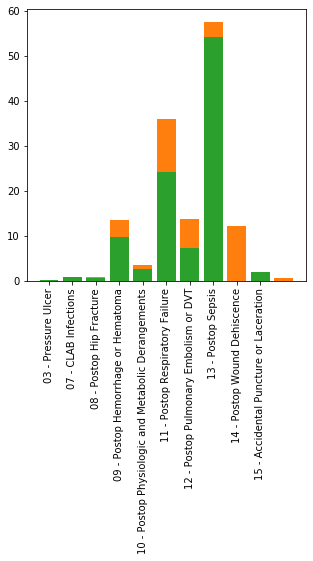

In [268]:
# plt.bar(ga_facility_psi_df)
# ga_facility_psi_df.plot.bar()
# va_facility_psi_df.plot.bar()
# ga_psi_df['Observed Rate']=ga_psi_df['Observed Rate'].replace({"*": 0})
# va_psi_df['Observed Rate']=va_psi_df['Observed Rate'].replace({"*": 0})
#  .loc[row_indexer,col_indexer] = value instead

x=ga_facility_psi_df["Indicator"]
y=ga_facility_psi_df["Observed Rate"]
x1=va_facility_psi_df["Indicator"]
y1=va_facility_psi_df["Observed Rate"]

# print(x)
# print(y)
# figure_layout = {
#     'width': '600px',
#     'height': '400px',
#     'border': '1px solid black',
#     'padding': '2px'
# }

tick_labels=ga_facility_psi_df["Indicator"]
# print (tick_labels)
plt.figure(figsize=[5,5])
plt.bar(x,y,tick_label=tick_labels)
plt.bar(x1,y1)
plt.bar(x,y)
# plt
# plt.plot(x,y)
plt.xticks(rotation=90)
# plt.plot()
# [6.4, 4.8]
# plt.show()